# Capstone #2 Notebook - two 'types' (after resampling)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob

## 1. Initial Sampling -- preprocessing stuff (skip over this)

First, resize the dataset from 1,000,000 articles to 10,000 articles that are either 'fake' or 'reliable'

In [3]:
c_size = 100000

listofchunks = []
for chunk in pd.read_csv("sampled_data1.csv",chunksize=c_size, lineterminator='\n', index_col=[0]):
    print(chunk.shape)
    listofchunks.append(chunk)

FileNotFoundError: [Errno 2] File b'sampled_data1.csv' does not exist: b'sampled_data1.csv'

In [4]:
df_concat = pd.concat(listofchunks)


ValueError: No objects to concatenate

In [5]:
df_concat.shape

NameError: name 'df_concat' is not defined

In [ ]:
df_concat.head(20)

In [3]:
new_df = df_concat[(df_concat['type'] == 'reliable') | (df_concat['type'] == 'fake') ]

NameError: name 'df_concat' is not defined

In [4]:
new_df.head()

NameError: name 'new_df' is not defined

In [5]:
new_df.shape

NameError: name 'new_df' is not defined

In [6]:
fake_new_df = new_df[new_df['type']== 'fake'].sample(n=10000, random_state=0)


NameError: name 'new_df' is not defined

In [14]:
fake_new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
8124,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1824,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
6585,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
8109,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
6802,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [15]:
reliable_new_df = new_df[new_df['type']== 'reliable'].sample(n=10000, random_state=0)



In [16]:
reliable_new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
6243,8565302,nytimes.com,reliable,https://www.nytimes.com/2002/06/12/world/castr...,President Fidel Castro of Cuba has called for ...,2018-02-11 00:36:49.247979,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Castro Calls March Against Bush's Criticism,NaN,NaN,"['CUBA', 'CASTRO FIDEL', 'BUSH GEORGE W', 'U...",Pres Fidel Castro calls for massive marches by...,NaN,NaN,nytimes
5016,9094077,nytimes.com,reliable,https://www.nytimes.com/2007/11/16/us/16missis...,"State officials, from Gov. Haley Barbour on do...",2018-02-11 00:42:02.956512,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"In Mississippi, Poor Lag in Hurricane Aid",Leslie Eaton,NaN,"['Mississippi', 'Hurricane Katrina', 'Federal ...",The state is the only one for which the White ...,NaN,NaN,nytimes
1433,8177850,in.reuters.com,reliable,http://in.reuters.com/video/2016/11/06/prisone...,Prisoners get out of jail for papal Mass at Va...,2016-11-06T21:31:24.468+02:00,2018-02-10 13:43:39.521661,2018-02-10 13:43:39.521686,Prisoners get out of jail for papal Mass at Va...,NaN,NaN,NaN,NaN,NaN,NaN,webhose
5821,9344883,nytimes.com,reliable,https://www.nytimes.com/2010/07/17/opinion/lwe...,To the Editor:\n\nRe “Toyota Concedes 2 Flaws ...,2018-02-11 00:44:30.539865,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Actions Taken by Toyota,NaN,NaN,"['Toyota Motor Corp', 'Automobile Safety Featu...",A reader responds to a recent article.,NaN,NaN,nytimes
2596,9461692,nytimes.com,reliable,https://www.nytimes.com/2011/12/02/business/fo...,“He is pushing them in a totally different dir...,2018-02-11 00:45:38.510127,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Ford Strives for Elegance in Lincoln Brand,Bill Vlasic,NaN,"['Ford Motor Company', 'Lincoln Division of Fo...",The automaker is striving to restore the luste...,NaN,NaN,nytimes


In [17]:
complete_new_df = pd.concat([fake_new_df, reliable_new_df])

In [18]:
complete_new_df.shape

(20000, 16)

In [21]:
complete_new_df.to_csv('complete_new_data.csv', index=False)

## 2.  Load in and examine Data

In [21]:
df = pd.read_csv('complete_new_data.csv')

In [22]:
df.shape

(20000, 16)

In [23]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com\n\n(Before It's News)\n\nCrown Equity Holdings Inc. (CRWE) Crown Equity Holdings Inc. (CRWE.OB) www.crownequityholdings.com,announced that it has launched two new online service companies. CRWE Direct and CRWE Real Estate. With expertise in online solutions and marketing, Crown Equity Holdings Inc. has launched CRWE Real Estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. The other is CRWE Direct (www.crwedirect.com), an online business-to-business (B2B) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. Manufacturers may start downloading their product immediately, free of charge during the next six months. Thereafter, there will be various annual fees. The listing process and image loading for both sites are user-friendly. Commenting on the launch, “The 2010 U.S. Census data shows estimates for B2B revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nSAN DIEGO, CA–(Marketwire – Aug 17, 2012) – The Barona Band of Mission Indians recently celebrated the 80th anniversary of the beginning of the historic Catholic Mission, a small stucco church on the reservation that was designed by renowned San Diego architect Irving J. Gill in the 1930s.\n\nThe celebration, which was attended by Tribal elders, Tribal members, parishioners and community residents, coincided with the Feast of the Assumption. A healing service and traditional blessing of the animals was also part of the celebration for the Mission that has served as a spiritual home for members of the Barona Tribe for 80 years.\n\nThe church has always been a source of pride for the people of Barona. It was the first building constructed on the reservation after the Tribe was relocated to the Barona Valley in the early 1930s when they were forced from their Capitan Grande reservation so the City of ...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80th Anniversary of the Beginning of the Barona Mission,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-for-it-2763030.html,"Go for it\n\n(Before It's News)\n\nThe morning after the morning we know who the next prime minister will be, the Bank of Canada takes centre stage. On October 21st the bank will make

In [24]:
df = df.rename_axis('document')

In [25]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com\n\n(Before It's News)\n\nCrown Equity Holdings Inc. (CRWE) Crown Equity Holdings Inc. (CRWE.OB) www.crownequityholdings.com,announced that it has launched two new online service companies. CRWE Direct and CRWE Real Estate. With expertise in online solutions and marketing, Crown Equity Holdings Inc. has launched CRWE Real Estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. The other is CRWE Direct (www.crwedirect.com), an online business-to-business (B2B) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. Manufacturers may start downloading their product immediately, free of charge during the next six months. Thereafter, there will be various annual fees. The listing process and image loading for both sites are user-friendly. Commenting on the launch, “The 2010 U.S. Census data shows estimates for B2B revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nSAN DIEGO, CA–(Marketwire – Aug 17, 2012) – The Barona Band of Mission Indians recently celebrated the 80th anniversary of the beginning of the historic Catholic Mission, a small stucco church on the reservation that was designed by renowned San Diego architect Irving J. Gill in the 1930s.\n\nThe celebration, which was attended by Tribal elders, Tribal members, parishioners and community residents, coincided with the Feast of the Assumption. A healing service and traditional blessing of the animals was also part of the celebration for the Mission that has served as a spiritual home for members of the Barona Tribe for 80 years.\n\nThe church has always been a source of pride for the people of Barona. It was the first building constructed on the reservation after the Tribe was relocated to the Barona Valley in the early 1930s when they were forced from their Capitan Grande reservation so the City of ...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80th Anniversary of the Beginning of the Barona Mission,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-for-it-2763030.html,"Go for it\n\n(Before It's News)\n\nThe morning after the morning we know who the next prime minister will be, the Bank of Canada takes centre stage. On Octobe

There is little useful information in the columns 'Unnamed:', 'tags', 'summary', and 'source'. Drop these columns.

In [26]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
document,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com\n\n(Before It's News)\n\nCrown Equity Holdings Inc. (CRWE) Crown Equity Holdings Inc. (CRWE.OB) www.crownequityholdings.com,announced that it has launched two new online service companies. CRWE Direct and CRWE Real Estate. With expertise in online solutions and marketing, Crown Equity Holdings Inc. has launched CRWE Real Estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. The other is CRWE Direct (www.crwedirect.com), an online business-to-business (B2B) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. Manufacturers may start downloading their product immediately, free of charge during the next six months. Thereafter, there will be various annual fees. The listing process and image loading for both sites are user-friendly. Commenting on the launch, “The 2010 U.S. Census data shows estimates for B2B revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nSAN DIEGO, CA–(Marketwire – Aug 17, 2012) – The Barona Band of Mission Indians recently celebrated the 80th anniversary of the beginning of the historic Catholic Mission, a small stucco church on the reservation that was designed by renowned San Diego architect Irving J. Gill in the 1930s.\n\nThe celebration, which was attended by Tribal elders, Tribal members, parishioners and community residents, coincided with the Feast of the Assumption. A healing service and traditional blessing of the animals was also part of the celebration for the Mission that has served as a spiritual home for members of the Barona Tribe for 80 years.\n\nThe church has always been a source of pride for the people of Barona. It was the first building constructed on the reservation after the Tribe was relocated to the Barona Valley in the early 1930s when they were forced from their Capitan Grande reservation so the City of ...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80th Anniversary of the Beginning of the Barona Mission,NaN,NaN,[''],NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-for-it-2763030.html,"Go for it\n\n(Before It's News)\n\nThe morning after the morning we know who the next prime minister will be, the Bank of Canada takes centre stage. On October 21st the bank will make its next rate announcement, accom

What are the different types of fake news represented in the dataset?

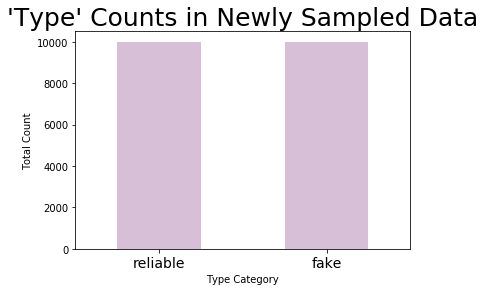

In [27]:
df.type.value_counts().plot(kind='bar', color='thistle')
plt.xlabel('Type Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts in Newly Sampled Data", fontsize=25)
plt.savefig('typecounts.png', bbox_inches='tight')

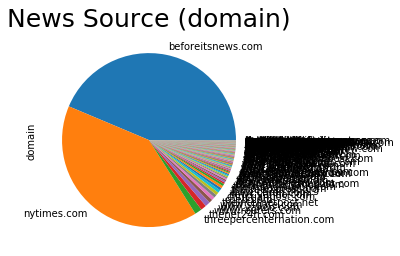

In [28]:

df.domain.value_counts().plot(kind='pie')
plt.title("News Source (domain)", fontsize=25)
plt.savefig('newssourcepie.png', bbox_inches='tight')

In [29]:
len(df.domain.unique())

141

Examine some 'content' values for the categories a little bit before delving into text analysis.

In [30]:
pd.set_option('display.max_colwidth', 1000)
print (df[df['type']=='fake']['content'].head())

document
0                                                                                                                                                                                                                                                                                                                                                                                                                           (Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more gre

# 3. Sentiment Analysis with VADER and textblob

In [31]:
fake = df[df['type']=='fake']

In [32]:
fake.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com\n\n(Before It's News)\n\nCrown Equity Holdings Inc. (CRWE) Crown Equity Holdings Inc. (CRWE.OB) www.crownequityholdings.com,announced that it has launched two new online service companies. CRWE Direct and CRWE Real Estate. With expertise in online solutions and marketing, Crown Equity Holdings Inc. has launched CRWE Real Estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. The other is CRWE Direct (www.crwedirect.com), an online business-to-business (B2B) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. Manufacturers may start downloading their product immediately, free of charge during the next six months. Thereafter, there will be various annual fees. The listing process and image loading for both sites are user-friendly. Commenting on the launch, “The 2010 U.S. Census data shows estimates for B2B revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nSAN DIEGO, CA–(Marketwire – Aug 17, 2012) – The Barona Band of Mission Indians recently celebrated the 80th anniversary of the beginning of the historic Catholic Mission, a small stucco church on the reservation that was designed by renowned San Diego architect Irving J. Gill in the 1930s.\n\nThe celebration, which was attended by Tribal elders, Tribal members, parishioners and community residents, coincided with the Feast of the Assumption. A healing service and traditional blessing of the animals was also part of the celebration for the Mission that has served as a spiritual home for members of the Barona Tribe for 80 years.\n\nThe church has always been a source of pride for the people of Barona. It was the first building constructed on the reservation after the Tribe was relocated to the Barona Valley in the early 1930s when they were forced from their Capitan Grande reservation so the City of ...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80th Anniversary of the Beginning of the Barona Mission,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-for-it-2763030.html,"Go for it\n\n(Before It's News)\n\nThe morning after the morning we know who the next prime minister will be, the Bank of Canada takes centre stage. On Octobe

In [33]:
fake.shape

(10000, 16)

In [34]:
fakecontent = set()

In [35]:
for index, row in fake.iterrows():
    fakecontent.add(row['content'])

In [36]:
print (len(fakecontent))

8994


In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for doc in fakecontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    results.append(pol_score)




In [38]:
fakedf = pd.DataFrame.from_records(results)

In [39]:
fakedf.shape

(8994, 5)

In [40]:
fakedf.head()

,compound,content,neg,neu,pos
0,-0.2584,"Although Ecuador had nothing to play for vs. Argentina, the FEF is taking a stand against the players.",0.113,0.887,0.000
1,0.8977,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nQuantum Memory And Turbulence In Ultra-Cold Atoms………\n\nScientists at MIT have figured out a key step toward the design of quantum information networks. The results are reported in the July 20th issue of Physical Review Letters and highlighted in APS’s online journal Physics.\n\nA quantum network – in which memory devices that store quantum states are interconnected with quantum information processing devices – is a prototype for designing a quantum internet. One path to making a quantum network is to map a light pulse onto nodes in a material system. Yet, it is one thing to catch a beam of light; it is more difficult to generate a signal that heralds that it has been successfully caught. Quantum systems follow Heisenberg’s rule that observing an event may destroy it, so the system has to emit just the right kind of herald pulse so as not to erase the data.\n\nNow, Haruka Tanji, Saikat Ghosh, Jonat...",0.023,0.913,0.064
2,0.9974,"Organic Fertilizer\n\n(Before It's News)\n\nOrganic Fertilizer\n\nNow that Spring is around the corner and the Earth is waking up from it’s winter slumber, it is time to start preparing to plant your garden. Hopefully, you have some seedlings started with the help of these handy tips and tricks but the soil needs to be prepared as well. What should you add to the soil to make it more nutrient rich? You could go to a big box store and buy a bag of synthetic fertilizer but if you are looking for the more natural route, there are plenty of organic fertilizers that are in many ways better than the manufactured kind.\n\nHow can you tell that they fertilizer you’re buying is organic or synthetic? One way to tell is to look at the nutrient proportions on the bag. If the numbers say 10-10-10 or any other perfectly proportioned, chances are the fertilizer is synthetic. Nature rarely comes that perfectly proportioned. What do the numbers mean? They represent the ratio of Nitrogen, Phosphorou...",0.028,0.773,0.199
3,0.3716,"(Before It's News)\n\nMTECHTIPS Gold Remains Bullish Above 1120.00\n\nThe sideways trading range continued to dominate\n\nmarket movements since yesterday, but ADX has overlapped bullishly over four-hour interval.\n\nThe bullishness remains valid due to trading above 1120.00, while RSI remains stable above 50.00 levels and above gold trades above moving averages. Thus, the bullishness could be seen over inside the sideways range of the triangle.\n\n1134.00 – 1130.00 – 1125.00\n\n1142.00 – 1151.00 – 1154.00\n\nBullish",0.017,0.945,0.038
4,0.9806,"Press Release: Jerry Brown Inc. Action Report\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nPress Releases from AG’s Office Double on the Eve of the Election Union Cronies Approach 30MM and Pledge 5MM More\n\nCUPERTINO – The Sacramento Bee Public Eye Blog dinged Jerry Brown this morning for stepping up his Attorney General’s media relations activities since July 1. The Bee reports that there has been an almost 50 percent increase over the average from the previous three years. We also learned today that Jerry Brown’s union cronies have blown past the $30 million dollar number in their quest to make Jerry Brown a wholly owned subsidiary.\n\n“Looks like you can add the Office of the Attorney General to the long list of members of Jerry Brown Inc. Not only has he enlisted the help of the unions to the tune of nearly $30 million, he’s also using taxpayer resources to grandstand, chas...",0.015,0.907,0.079


In [41]:
fakedf['label'] = 0
fakedf.loc[fakedf['compound'] > 0.2, 'label'] = 1
fakedf.loc[fakedf['compound'] < -0.2, 'label'] = -1

In [42]:
fakedf.label.value_counts()

 1    5468
-1    3013
 0     513
Name: label, dtype: int64

In [43]:
print (fakedf['compound'].mean())

0.24890721592172574


In [44]:
print (fakedf['neg'].mean())

0.06670980653769144


In [45]:
print (fakedf['neu'].mean())

0.8406761174116071


In [46]:
print (fakedf['pos'].mean())

0.09262096953524585


In [78]:
def textblob_polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[0]

In [79]:
fakedf["textblob_polarity_score"] = fakedf["content"].apply(textblobscore)

In [80]:
def textblob_subjectivity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[1]

In [81]:
fakedf["textblob_subjectivity_score"] = fakedf["content"].apply(textblob_subjectivity_score)

In [82]:
fakedf['text_blob_polarity_label'] = 0
fakedf.loc[reldf['textblob_polarity_score'] > 0.2, 'text_blob_polarity_label'] = 1
fakedf.loc[reldf['textblob_polarity_score'] < -0.2, 'text_blob_polarity_label'] = -1

In [83]:
fakedf['text_blob_subjectivity_label'] = 0
fakedf.loc[reldf['textblob_subjectivity_score'] > 0.2, 'text_blob_subjectivity_label'] = 1
fakedf.loc[reldf['textblob_subjectivity_score'] < -0.2, 'text_blob_subjectivity_label'] = -1

In [84]:
fakedf.head()

,compound,content,neg,neu,pos,label,textblob_polarity_score,textblob_subjectivity_score,text_blob_polarity_label,text_blob_subjectivity_label
0,-0.2584,"Although Ecuador had nothing to play for vs. Argentina, the FEF is taking a stand against the players.",0.113,0.887,0.000,-1,0.000000,0.000000,0,1
1,0.8977,"Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nQuantum Memory And Turbulence In Ultra-Cold Atoms………\n\nScientists at MIT have figured out a key step toward the design of quantum information networks. The results are reported in the July 20th issue of Physical Review Letters and highlighted in APS’s online journal Physics.\n\nA quantum network – in which memory devices that store quantum states are interconnected with quantum information processing devices – is a prototype for designing a quantum internet. One path to making a quantum network is to map a light pulse onto nodes in a material system. Yet, it is one thing to catch a beam of light; it is more difficult to generate a signal that heralds that it has been successfully caught. Quantum systems follow Heisenberg’s rule that observing an event may destroy it, so the system has to emit just the right kind of herald pulse so as not to erase the data.\n\nNow, Haruka Tanji, Saikat Ghosh, Jonat...",0.023,0.913,0.064,1,0.156169,0.625162,0,1
2,0.9974,"Organic Fertilizer\n\n(Before It's News)\n\nOrganic Fertilizer\n\nNow that Spring is around the corner and the Earth is waking up from it’s winter slumber, it is time to start preparing to plant your garden. Hopefully, you have some seedlings started with the help of these handy tips and tricks but the soil needs to be prepared as well. What should you add to the soil to make it more nutrient rich? You could go to a big box store and buy a bag of synthetic fertilizer but if you are looking for the more natural route, there are plenty of organic fertilizers that are in many ways better than the manufactured kind.\n\nHow can you tell that they fertilizer you’re buying is organic or synthetic? One way to tell is to look at the nutrient proportions on the bag. If the numbers say 10-10-10 or any other perfectly proportioned, chances are the fertilizer is synthetic. Nature rarely comes that perfectly proportioned. What do the numbers mean? They represent the ratio of Nitrogen, Phosphorou...",0.028,0.773,0.199,1,0.371280,0.552827,0,1
3,0.3716,"(Before It's News)\n\nMTECHTIPS Gold Remains Bullish Above 1120.00\n\nThe sideways trading range continued to dominate\n\nmarket movements since yesterday, but ADX has overlapped bullishly over four-hour interval.\n\nThe bullishness remains valid due to trading above 1120.00, while RSI remains stable above 50.00 levels and above gold trades above moving averages. Thus, the bullishness could be seen over inside the sideways range of the triangle.\n\n1134.00 – 1130.00 – 1125.00\n\n1142.00 – 1151.00 – 1154.00\n\nBullish",0.017,0.945,0.038,1,-0.020833,0.145833,0,1
4,0.9806,"Press Release: Jerry Brown Inc. Action Report\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nPress Releases from AG’s Office Double on the Eve of the Election Union Cronies Approach 30MM and Pledge 5MM More\n\nCUPERTINO – The Sacramento Bee Public Eye Blog dinged Jerry Brown this morning for stepping up his Attorney General’s media relations activities since July 1. The Bee reports that there has been an almost 50 percent increase over the average from the previous three years. We also learned today that Jerry Brown’s union cronies have blown past the $30 million dollar number in their quest to make Jerry Brown a wholly owned subsidiary.\n\n“Looks like you can add the Office of the Attorney General to the long list of members of Jerry Brown Inc. Not only has he enlisted the help of the unions to the tune of nearly $30 million, he’s also using taxpayer resources to grandstand, chas...",0.015,

In [86]:
fakedf.text_blob_polarity_label.value_counts()

 0    7944
 1     983
-1      67
Name: text_blob_polarity_label, dtype: int64

In [87]:
fakedf.text_blob_subjectivity_label.value_counts()

1    8556
0     438
Name: text_blob_subjectivity_label, dtype: int64

In [47]:
reliable = df[df['type']=='reliable']

In [48]:
reliable.shape

(10000, 16)

In [49]:
relcontent = set()

In [50]:
for index, row in reliable.iterrows():
    relcontent.add(row['content'])

In [51]:
relresults = []
for doc in relcontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    relresults.append(pol_score)

In [52]:
reldf = pd.DataFrame.from_records(relresults)



In [53]:
reldf.head()

,compound,content,neg,neu,pos
0,0.9874,"United Nations (United States) (AFP) - UN Secretary-General Ban Ki-moon voiced confidence on Friday that Donald Trump will shed the strident rhetoric that propelled him to the White House and engage with the world to confront global crises like climate change. Ban told AFP in an interview that he hopes to meet with the US president-elect in the coming weeks to explain how the United Nations expects the United States to ""continue to work for humanity.""\nTrump won the US presidency on a platform that calls for closer ties with Russia, pulling out of the Paris climate deal, shaking up security alliances and questioning US funding of the United Nations.\n""This is what he said during the campaign period, on the campaign trail,"" Ban said in the interview at UN headquarters where the Trump victory has shocked world diplomats.\n""Now, post-election, when he creates his transition team with experts and people with vision and expertise, I am sure that the United States will continue to play a...",0.094,0.756,0.150
1,-0.9973,"\n\nTo the Editor:\n\nRe ''Attica Endures: Walled-Off Facts From the Old Prison Riot,'' by Francis X. Clines (Editorial Observer, Sept. 17):\n\nWe are the lawyers who won a $12 million settlement after decades of obfuscation by New York State in the 1971 Attica prison riot. ''Crucial details'' that the article claims have been denied to the hostages' families -- how the state police came to kill the hostages, how official discipline collapsed and where the lie that the inmates murdered the hostages originated -- were presented in detail to a federal jury in Buffalo in 1991-92 as part of Al-Jundi v. Rockefeller, the class-action suit by the Attica Brothers, a group of prisoners.\n\nThe state assault forces indiscriminately killed 39 hostages and prisoners after they were worked up into a racist frenzy by state officials.\n\nAccording to his testimony before the McKay Commission, which was admitted at our trial, John Monahan of the state police ''designed'' the attack, which was orde...",0.237,0.714,0.049
2,-0.9838,"“I consider the presence of hexamine both in the field samples and in the official stockpile of the Syrian government to be very damning evidence of government culpability,” Mr. Kaszeta wrote on his website.\n\nThe Syrian government, which has denied carrying out any of the attacks, declared possession of 80 tons of hexamine. It is listed among substances that need to be treated and disposed, according to the Organization for the Prohibition of Chemical Weapons, or O.P.C.W., a group based in The Hague working with the United Nations to oversee the dismantling of Syria’s arsenal.\n\nThe group in November invited bids from companies that could carry out the disposal. Before that bidding invitation was made public, it had not been widely known that Syria had hexamine. The group has not said whether and how Syria used hexamine.\n\nAsked about the presence of hexamine in the annex of the United Nations panel’s report, Scott Cairns, a chemical weapons expert who is a member of the panel,...",0.087,0.863,0.050
3,0.4678,"To the Editor:\n\nRe “Auto Chiefs Make Headway Against a Mileage Increase” (Business Day, June 7):\n\nAnyone with a passing knowledge of the predicted impacts of global warming, and an ounce of common sense, should view with horror and disbelief the recent bullying push by Big Coal to lock the United States into generations of ever-growing, coal-based greenhouse gas emissions, and the latest refusal by the Big Three to make their automobiles significantly more fuel-efficient.\n\nDo these corporate executives, and their well-supported political allies in Washington, really not understand what is at stake here? That we are fast approaching changes to the planet’s physical, chemical and biological systems that will last for hundreds if not many thousands of years. That as long as the United States does little to cap its escalating emissions, China and India

In [54]:
reldf.shape

(9746, 5)

In [55]:
reldf['label'] = 0
reldf.loc[reldf['compound'] > 0.2, 'label'] = 1
reldf.loc[reldf['compound'] < -0.2, 'label'] = -1

In [91]:
reldf.label.value_counts()

 1    6602
-1    2577
 0     567
Name: label, dtype: int64

In [57]:
print (reldf['compound'].mean())

0.3815713626103003


In [58]:
print (reldf['neg'].mean())

0.060494767083931505


In [59]:
print (reldf['neu'].mean())

0.8466892058280351


In [60]:
print (reldf['pos'].mean())

0.09281397496408789


In [66]:
def textblob_polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[0]

In [68]:
reldf["textblob_polarity_score"] = reldf["content"].apply(textblobscore)

In [69]:
def textblob_subjectivity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[1]

In [70]:
reldf["textblob_subjectivity_score"] = reldf["content"].apply(textblob_subjectivity_score)

In [71]:
reldf.head()

,compound,content,neg,neu,pos,label,textblob_score,textblob_polarity_score,textblob_subjectivity_score
0,0.9874,"United Nations (United States) (AFP) - UN Secretary-General Ban Ki-moon voiced confidence on Friday that Donald Trump will shed the strident rhetoric that propelled him to the White House and engage with the world to confront global crises like climate change. Ban told AFP in an interview that he hopes to meet with the US president-elect in the coming weeks to explain how the United Nations expects the United States to ""continue to work for humanity.""\nTrump won the US presidency on a platform that calls for closer ties with Russia, pulling out of the Paris climate deal, shaking up security alliances and questioning US funding of the United Nations.\n""This is what he said during the campaign period, on the campaign trail,"" Ban said in the interview at UN headquarters where the Trump victory has shocked world diplomats.\n""Now, post-election, when he creates his transition team with experts and people with vision and expertise, I am sure that the United States will continue to play a...",0.094,0.756,0.150,1,0.117560,0.117560,0.355439
1,-0.9973,"\n\nTo the Editor:\n\nRe ''Attica Endures: Walled-Off Facts From the Old Prison Riot,'' by Francis X. Clines (Editorial Observer, Sept. 17):\n\nWe are the lawyers who won a $12 million settlement after decades of obfuscation by New York State in the 1971 Attica prison riot. ''Crucial details'' that the article claims have been denied to the hostages' families -- how the state police came to kill the hostages, how official discipline collapsed and where the lie that the inmates murdered the hostages originated -- were presented in detail to a federal jury in Buffalo in 1991-92 as part of Al-Jundi v. Rockefeller, the class-action suit by the Attica Brothers, a group of prisoners.\n\nThe state assault forces indiscriminately killed 39 hostages and prisoners after they were worked up into a racist frenzy by state officials.\n\nAccording to his testimony before the McKay Commission, which was admitted at our trial, John Monahan of the state police ''designed'' the attack, which was orde...",0.237,0.714,0.049,-1,-0.062626,-0.062626,0.290188
2,-0.9838,"“I consider the presence of hexamine both in the field samples and in the official stockpile of the Syrian government to be very damning evidence of government culpability,” Mr. Kaszeta wrote on his website.\n\nThe Syrian government, which has denied carrying out any of the attacks, declared possession of 80 tons of hexamine. It is listed among substances that need to be treated and disposed, according to the Organization for the Prohibition of Chemical Weapons, or O.P.C.W., a group based in The Hague working with the United Nations to oversee the dismantling of Syria’s arsenal.\n\nThe group in November invited bids from companies that could carry out the disposal. Before that bidding invitation was made public, it had not been widely known that Syria had hexamine. The group has not said whether and how Syria used hexamine.\n\nAsked about the presence of hexamine in the annex of the United Nations panel’s report, Scott Cairns, a chemical weapons expert who is a member of the panel,...",0.087,0.863,0.050,-1,0.028886,0.028886,0.401832
3,0.4678,"To the Editor:\n\nRe “Auto Chiefs Make Headway Against a Mileage Increase” (Business Day, June 7):\n\nAnyone with a passing knowledge of the predicted impacts of global warming, and an ounce of common sense, should view with horror and disbelief the recent bullying push by Big Coal to lock the United States into generations of ever-growing, coal-based greenhouse gas emissions, and the latest refusal by the Big Three to make their automobiles significantly more fuel-efficient.\n\nDo these corporate executives, and their well-supported political allies in Washington, really not understand what is at stake here? That we are fast approaching changes to the planet’s physical, chemical and biologica

In [72]:
reldf['text_blob_polarity_label'] = 0
reldf.loc[reldf['textblob_polarity_score'] > 0.2, 'text_blob_polarity_label'] = 1
reldf.loc[reldf['textblob_polarity_score'] < -0.2, 'text_blob_polarity_label'] = -1

In [75]:
reldf['text_blob_subjectivity_label'] = 0
reldf.loc[reldf['textblob_subjectivity_score'] > 0.2, 'text_blob_subjectivity_label'] = 1
reldf.loc[reldf['textblob_subjectivity_score'] < -0.2, 'text_blob_subjectivity_label'] = -1

In [76]:
reldf.head()

,compound,content,neg,neu,pos,label,textblob_score,textblob_polarity_score,textblob_subjectivity_score,text_blob_polarity_label,text_blob_subjectivity_label
0,0.9874,"United Nations (United States) (AFP) - UN Secretary-General Ban Ki-moon voiced confidence on Friday that Donald Trump will shed the strident rhetoric that propelled him to the White House and engage with the world to confront global crises like climate change. Ban told AFP in an interview that he hopes to meet with the US president-elect in the coming weeks to explain how the United Nations expects the United States to ""continue to work for humanity.""\nTrump won the US presidency on a platform that calls for closer ties with Russia, pulling out of the Paris climate deal, shaking up security alliances and questioning US funding of the United Nations.\n""This is what he said during the campaign period, on the campaign trail,"" Ban said in the interview at UN headquarters where the Trump victory has shocked world diplomats.\n""Now, post-election, when he creates his transition team with experts and people with vision and expertise, I am sure that the United States will continue to play a...",0.094,0.756,0.150,1,0.117560,0.117560,0.355439,0,1
1,-0.9973,"\n\nTo the Editor:\n\nRe ''Attica Endures: Walled-Off Facts From the Old Prison Riot,'' by Francis X. Clines (Editorial Observer, Sept. 17):\n\nWe are the lawyers who won a $12 million settlement after decades of obfuscation by New York State in the 1971 Attica prison riot. ''Crucial details'' that the article claims have been denied to the hostages' families -- how the state police came to kill the hostages, how official discipline collapsed and where the lie that the inmates murdered the hostages originated -- were presented in detail to a federal jury in Buffalo in 1991-92 as part of Al-Jundi v. Rockefeller, the class-action suit by the Attica Brothers, a group of prisoners.\n\nThe state assault forces indiscriminately killed 39 hostages and prisoners after they were worked up into a racist frenzy by state officials.\n\nAccording to his testimony before the McKay Commission, which was admitted at our trial, John Monahan of the state police ''designed'' the attack, which was orde...",0.237,0.714,0.049,-1,-0.062626,-0.062626,0.290188,0,1
2,-0.9838,"“I consider the presence of hexamine both in the field samples and in the official stockpile of the Syrian government to be very damning evidence of government culpability,” Mr. Kaszeta wrote on his website.\n\nThe Syrian government, which has denied carrying out any of the attacks, declared possession of 80 tons of hexamine. It is listed among substances that need to be treated and disposed, according to the Organization for the Prohibition of Chemical Weapons, or O.P.C.W., a group based in The Hague working with the United Nations to oversee the dismantling of Syria’s arsenal.\n\nThe group in November invited bids from companies that could carry out the disposal. Before that bidding invitation was made public, it had not been widely known that Syria had hexamine. The group has not said whether and how Syria used hexamine.\n\nAsked about the presence of hexamine in the annex of the United Nations panel’s report, Scott Cairns, a chemical weapons expert who is a member of the panel,...",0.087,0.863,0.050,-1,0.028886,0.028886,0.401832,0,1
3,0.4678,"To the Editor:\n\nRe “Auto Chiefs Make Headway Against a Mileage Increase” (Business Day, June 7):\n\nAnyone with a passing knowledge of the predicted impacts of global warming, and an ounce of common sense, should view with horror and disbelief the recent bullying push by Big Coal to lock the United States into generations of ever-growing, coal-based greenhouse gas emissions, and the latest refusal by the Big Three to make their automobiles significantly more fuel-efficient.\n\nDo these corporate executives, and their well-supported political allies in Washington, really not understand what is at stake here? That we are fast ap

In [74]:
reldf.text_blob_polarity_label.value_counts()

 0    8604
 1    1069
-1      73
Name: text_blob_polarity_label, dtype: int64

In [77]:
reldf.text_blob_subjectivity_label.value_counts()

1    9276
0     470
Name: text_blob_subjectivity_label, dtype: int64

There is only a notable difference in the polarity scores for the 'fake' and 'reliable' data using the nltk Vader SIA. There is no notable difference between the groups with the TextBlob polarity and subjectivity scores.  

## 4. Predictive Analysis

### a. predictive analysis with initially sampled data

## **Preprocessing**

**Convert text to lowercase.**

In [102]:
df['content'] = df['content'].str.lower()


**Tokenize the article text in the dataset.**

In [103]:
df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(row["content"]), axis=1)

In [99]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content
document,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[(, crwe, ,, pld, ,, cw, ,, chh, ), stocks, in, review, by, pennytobuck.com, (, before, it, 's, news, ), crown, equity, holdings, inc., (, crwe, ), crown, equity, holdings, inc., (, crwe.ob, ), www.crownequityholdings.com, ,, announced, that, it, has, launched, two, new, online, service, companies, ., crwe, direct, and, crwe, real, estate, ., with, expertise, in, online, solutions, and, marketing, ,, crown, equity, holdings, inc., has, launched, crwe, real, estate, (, www.crwerealestate.com, ), to, provide, a, global, portal, for, property, listings, at, a, fee, of, only, $, $, 1, a, day, ., the, other, is, crwe, direct, (, www.crwedirect.com, ...]"
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!\n\nsan diego, ca–(marketwire – aug 17, 2012) – the barona band of mission indians recently celebrated the 80th anniversary of th

**Remove punctuation from tokenized documents**

In [100]:
punctuation = string.punctuation


In [101]:
def remove_punc(row):
    tokens = row['tokenized_content']
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

df['no_punc_content'] = df.apply(remove_punc, axis=1)

In [124]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content
document,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[(, crwe, ,, pld, ,, cw, ,, chh, ), stocks, in, review, by, pennytobuck.com, (, before, it, 's, news, ), crown, equity, holdings, inc., (, crwe, ), crown, equity, holdings, inc., (, crwe.ob, ), www.crownequityholdings.com, ,, announced, that, it, has, launched, two, new, online, service, companies, ., crwe, direct, and, crwe, real, estate, ., with, expertise, in, online, solutions, and, marketing, ,, crown, equity, holdings, inc., has, launched, crwe, real, estate, (, www.

**Apply stemming to tokens.**

In [125]:
ps = PorterStemmer()


In [126]:
def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemmed_content, axis=1)

In [127]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words
document,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, 

**Remove stop words**

In [128]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df['no_stop_stemmed'] = df.apply(remove_stop, axis=1)



In [129]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words,no_stop_stemmed
document,,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]","[befor, news, okay, one, horribl, aw, terribl, week, anoth, post, one, plan, write, end, week, posit, note, lucki, winner, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, hour, claim, prize, thank, much, everyon, enter, great, giveaway]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product

Save preprocessed data to .csv just in case.

## Classification ##

**1. Create Count Vectorizer**

Rejoin lists of words in the 'no_stop_stemmed' column.

In [130]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df['pre_processed_text'] = df.apply(rejoin, axis=1)

In [131]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,...,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
document,,,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,...,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]","[befor, news, okay, one, horribl, aw, terribl, week, anoth, post, one, plan, write, end, week, posit, note, lucki, winner, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, hour, claim, prize, thank, much, everyon, enter, great, giveaway]",befor news okay one horribl aw terribl week anoth post one plan write end week posit note lucki winner announc rins hopper krysta healthi herbal nutrient rene simpl green jennif wholesal costum club marti mamalov rita kimochi melissa congrat winner hour claim prize thank much everyon enter great giveaway
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealest

In [132]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [133]:
df = df.dropna(subset=['type'])

In [134]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [135]:
y = df.type


In [136]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_processed_text'], y, test_size=0.33, random_state=53)

In [137]:
count_vectorizer = CountVectorizer(stop_words='english')


In [138]:
count_train = count_vectorizer.fit_transform(X_train)


In [139]:
count_test = count_vectorizer.transform(X_test)


In [140]:
print(count_vectorizer.get_feature_names()[:1000])


['aa', 'aaa', 'aaaaaargh', 'aab', 'aabgu', 'aac', 'aachen', 'aadmi', 'aadvantag', 'aae', 'aafia', 'aafp', 'aag', 'aagot', 'aah', 'aakash', 'aakrosh', 'aal', 'aalborg', 'aalim', 'aaltci', 'aalto', 'aam', 'aaman', 'aamaq', 'aamer', 'aamet', 'aamir', 'aamoth', 'aamva', 'aan', 'aanbevel', 'aanbevelingen', 'aangetoond', 'aanic', 'aantoonbaar', 'aap', 'aapl', 'aar', 'aardman', 'aardvarchaeolog', 'aarhu', 'aaron', 'aaronson', 'aarp', 'aasan', 'aastrom', 'aau', 'aauster', 'aav', 'ab', 'aba', 'ababa', 'ababneh', 'abacaba', 'aback', 'abacu', 'abaddon', 'abadi', 'abadin', 'abadiânia', 'abagnal', 'abaixo', 'abalamo', 'aballo', 'abalo', 'abalon', 'abandon', 'abandono', 'abash', 'abasi', 'abasto', 'abat', 'abatti', 'abattoir', 'abaya', 'abb', 'abba', 'abbado', 'abbasi', 'abbasid', 'abbeel', 'abbevil', 'abbey', 'abbeywood', 'abbi', 'abbot', 'abbott', 'abboud', 'abbrevi', 'abbruzzes', 'abbvi', 'abc', 'abcam', 'abd', 'abdallah', 'abdel', 'abdelatti', 'abdelaziz', 'abdelhakim', 'abdeljab', 'abdellatif',

**Train and test the model**

In [141]:
nb_classifier = MultinomialNB()


In [142]:
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)


In [143]:
score = metrics.accuracy_score(y_test, pred)
print(score)


0.8810606060606061


**Same but with tf-idf**

In [144]:
tfidf_vect = TfidfVectorizer()


In [145]:
X_tfidf_train = tfidf_vect.fit_transform(X_train)



In [146]:
X_tfidf_test = tfidf_vect.transform(X_test)



In [147]:
nb_classifier.fit(X_tfidf_train, y_train)
pred = nb_classifier.predict(X_tfidf_test)

In [148]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.8893939393939394


In [149]:
def show_most_informative_features(vectorizer, clf, n=1000):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        
        

In [150]:
show_most_informative_features(tfidf_vect, nb_classifier)

	-11.8187	aaaaaargh      		-6.1732	said           
	-11.8187	aac            		-6.2829	wa             
	-11.8187	aae            		-6.4255	hi             
	-11.8187	aafia          		-6.6342	new            
	-11.8187	aafp           		-6.7174	ha             
	-11.8187	aag            		-6.8791	york           
	-11.8187	aakash         		-6.9437	time           
	-11.8187	aaltci         		-6.9609	newslett       
	-11.8187	aamer          		-7.0348	thi            
	-11.8187	aamet          		-7.0531	year           
	-11.8187	aamir          		-7.0596	pleas          
	-11.8187	aamva          		-7.0686	main           
	-11.8187	aan            		-7.0809	continu        
	-11.8187	aanbevel       		-7.1422	would          
	-11.8187	aanbevelingen  		-7.1801	one            
	-11.8187	aangetoond     		-7.2354	read           
	-11.8187	aanic          		-7.2448	stori          
	-11.8187	aantoonbaar    		-7.2558	sign           
	-11.8187	aardvarchaeolog		-7.2773	state          
	-11.8187	aastrom        		-7.3

**Tf-idf with bigrams**

In [151]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))



In [152]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)



In [153]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)



In [154]:
nb_classifier.fit(X_tfidf__bigrams_train, y_train)
pred = nb_classifier.predict(X_tfidf__bigrams_test)

In [155]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9286363636363636


In [156]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-14.5074	aa aaa         		-9.8446	new york       
	-14.5074	aa ab          		-10.0505	main stori     
	-14.5074	aa astronom    		-10.0511	read main      
	-14.5074	aa averag      		-10.0604	continu read   
	-14.5074	aa batteri     		-10.2364	york time      
	-14.5074	aa demis       		-10.4231	advertis continu
	-14.5074	aa ex          		-10.9668	time newslett  
	-14.5074	aa financi     		-10.9689	email address  
	-14.5074	aa first       		-10.9707	unit state     
	-14.5074	aa fit         		-10.9720	view new       
	-14.5074	aa high        		-10.9817	offer new      
	-14.5074	aa hit         		-10.9823	product servic 
	-14.5074	aa like        		-10.9835	newslett sign  
	-14.5074	aa one         		-10.9844	newslett subscrib
	-14.5074	aa regular     		-10.9849	must select    
	-14.5074	aa struck      		-10.9849	time product   
	-14.5074	aa trigger     		-10.9849	error ha       
	-14.5074	aaa aa         		-10.9852	verifi robot   
	-14.5074	aaa across     		-10.9852	updat special  
	-14.5074	

The above results show that bigrams relating directly to the newspaper the New York Times are most predictive.  This is problematic because we want the classifier to predict whether an article is fake or reliable -- not whether it appeared in the New York Times.

Thus, the data can be resampled. 

Let's try to undersample the data, so that fewer articles from the New York Times are in the dataset. 

## b. predictive analysis with initially sampled data

## Same Analysis, with Undersampling, given the preponderance of NYT articles

In [157]:
df.type.value_counts()

reliable    10000
fake        10000
Name: type, dtype: int64

In [158]:
df.domain.value_counts()

beforeitsnews.com              8733
nytimes.com                    8057
threepercenternation.com        267
thenet24h.com                   210
www.reuters.com                 187
www.yahoo.com                   133
www.sfgate.com                  121
theinternetpost.net             115
coed.com                        113
christianpost.com               107
news.yahoo.com                   93
www.chron.com                    93
thefreepatriot.org               84
indianexpress.com                60
thetruthdivision.com             57
uk.finance.yahoo.com             55
www.huffingtonpost.com           52
newswithviews.com                49
therightscoop.com                46
www.msn.com                      44
abcnews.go.com                   44
uk.reuters.com                   43
sports.yahoo.com                 42
nutritionfacts.org               39
consortiumnews.com               33
www.theguardian.com              32
www.businessinsider.com          31
realnewsrightnow.com        

NYT and Beforeitsnews are vastly overrepresented in the data. Let's preform undersampling.

In [159]:
nyt = df[df['domain'] == "nytimes.com"]


In [160]:
nyt_sample = nyt.sample(100)


In [161]:
nyt_sample.shape

(100, 21)

In [162]:
mask = df['domain'].isin(['nytimes.com', 'beforeitsnews.com'])
newdf = df[~mask]

In [163]:
bef = df[df['domain'] == "beforeitsnews.com"]

In [164]:
bef_sample = bef.sample(100)



In [165]:
newdf.domain.value_counts()

threepercenternation.com       267
thenet24h.com                  210
www.reuters.com                187
www.yahoo.com                  133
www.sfgate.com                 121
theinternetpost.net            115
coed.com                       113
christianpost.com              107
news.yahoo.com                  93
www.chron.com                   93
thefreepatriot.org              84
indianexpress.com               60
thetruthdivision.com            57
uk.finance.yahoo.com            55
www.huffingtonpost.com          52
newswithviews.com               49
therightscoop.com               46
www.msn.com                     44
abcnews.go.com                  44
uk.reuters.com                  43
sports.yahoo.com                42
nutritionfacts.org              39
consortiumnews.com              33
www.theguardian.com             32
realnewsrightnow.com            31
www.businessinsider.com         31
newslo.com                      30
clashdaily.com                  30
www.nytimes.com     

In [166]:
df_undersampling = pd.concat([newdf, nyt_sample, bef_sample], axis=0)


In [167]:
df_undersampling.domain.value_counts()

threepercenternation.com       267
thenet24h.com                  210
www.reuters.com                187
www.yahoo.com                  133
www.sfgate.com                 121
theinternetpost.net            115
coed.com                       113
christianpost.com              107
nytimes.com                    100
beforeitsnews.com              100
www.chron.com                   93
news.yahoo.com                  93
thefreepatriot.org              84
indianexpress.com               60
thetruthdivision.com            57
uk.finance.yahoo.com            55
www.huffingtonpost.com          52
newswithviews.com               49
therightscoop.com               46
abcnews.go.com                  44
www.msn.com                     44
uk.reuters.com                  43
sports.yahoo.com                42
nutritionfacts.org              39
consortiumnews.com              33
www.theguardian.com             32
www.businessinsider.com         31
realnewsrightnow.com            31
newslo.com          

Analysis

In [168]:
df_undersampling['content'] = df_undersampling['content'].str.lower()



In [169]:
df_undersampling['tokenized_content'] = df_undersampling.apply(lambda row: nltk.word_tokenize(row["content"]), axis=1)
punctuation = string.punctuation

def remove_punc(row):
    tokens = row['tokenized_content']
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens
df_undersampling['no_punc_content'] = df_undersampling.apply(remove_punc, axis=1)


In [170]:


def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df_undersampling['stemmed_words'] = df_undersampling.apply(stemmed_content, axis=1)


In [171]:

english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df_undersampling['no_stop_stemmed'] = df_undersampling.apply(remove_stop, axis=1)


In [172]:

def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df_undersampling['pre_processed_text'] = df_undersampling.apply(rejoin, axis=1)

In [173]:
y = df_undersampling.type


In [174]:

X_train, X_test, y_train, y_test = train_test_split(df_undersampling['pre_processed_text'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

In [175]:

count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print(score)


0.7850799289520426


This is in contrast to the 88% prior to undersampling.

In [176]:
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'fake'])
print(cm)

[[575 105]
 [137 309]]


In [177]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))



In [178]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)



In [179]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)



In [180]:
nb_classifier.fit(X_tfidf__bigrams_train, y_train)
pred = nb_classifier.predict(X_tfidf__bigrams_test)

In [181]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.6953818827708703


In [182]:
def show_most_informative_features(vectorizer, clf, n=1000):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        

In [183]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-12.8817	aamva intern   		-10.6134	new york       
	-12.8817	aaron alexi    		-10.6330	donald trump   
	-12.8817	aaron carter   		-10.9317	thomson reuter 
	-12.8817	aaron eckhart  		-11.0270	unit state     
	-12.8817	aaron hit      		-11.0935	compani coverag
	-12.8817	aaron johnson  		-11.1239	sourc text     
	-12.8817	aaron mandelkorn		-11.1688	nov est        
	-12.8817	aaron moxi     		-11.1728	major leagu    
	-12.8817	aaron put      		-11.2220	last year      
	-12.8817	aaron reach    		-11.2505	thi year       
	-12.8817	aaron reaction 		-11.3047	associ press   
	-12.8817	aasaht believ  		-11.3233	market news    
	-12.8817	ab admit       		-11.3234	symbol price   
	-12.8817	ab go          		-11.3234	relat quot     
	-12.8817	ab kill        		-11.3234	quot symbol    
	-12.8817	ab made        		-11.3257	leagu basebal  
	-12.8817	abandon ani    		-11.3283	price chang    
	-12.8817	abandon children		-11.3291	hillari clinton
	-12.8817	abandon die    		-11.3564	last week      
	-12.8817	

The least predictive features are shown in the left-hand column, and the most predictive features are shown in the right-hand column. 

## c. multi-class classification

In [194]:
df = pd.read_csv('newly_sampled_data.csv')

In [195]:
df.type.value_counts()

reliable      2201
political     2040
bias          1342
fake          1031
conspiracy     954
rumor          523
unknown        449
unreliable     364
clickbait      268
junksci        145
satire         118
hate            93
Name: type, dtype: int64

Text(0.5, 1.0, "'Type' Counts in Initally Sampled Data")

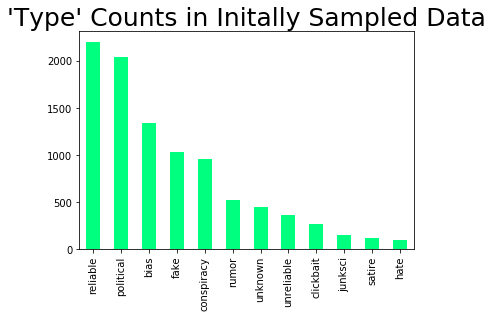

In [196]:
df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("'Type' Counts in Initally Sampled Data", fontsize=25)

Take the top four categories to make a new df. 

In [197]:
fake_new_df = df[df['type']== 'fake'].sample(n=1000, random_state=0)

In [198]:
bias_new_df = df[df['type']== 'bias'].sample(n=1000, random_state=0)

In [199]:
political_new_df = df[df['type']== 'political'].sample(n=1000, random_state=0)

In [200]:
reliable_new_df = df[df['type']== 'reliable'].sample(n=1000, random_state=0)

In [201]:
new_df = pd.concat([fake_new_df, reliable_new_df,bias_new_df,political_new_df])

Text(0.5, 1.0, "New 'Type' Counts in Sampled Data")

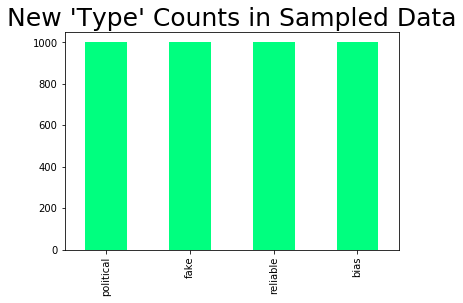

In [202]:
new_df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("New 'Type' Counts in Sampled Data", fontsize=25)

In [203]:
new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
9126,6657008,beforeitsnews.com,fake,http://beforeitsnews.com/health/2014/07/spain-first-case-filed-against-hpv-vaccine-manufacturers-and-health-authorities-2541722.html,"Spain: First case filed against HPV vaccine manufacturers and health authorities\n\n% of readers think this story is Fact. Add your two cents.\n\n(Before It's News)\n\nby Alicia Capilla (President of AAVP)\n\nAAVP, together with law firm Almodóvar & Jara, filed the first of a long series of lawsuits for damages caused by HPV vaccines. The complaint is filed in the High Court against health authorities and vaccine manufacturers.\n\nThe process of trying to find justice now begins for one of the Valencian girls who suffered an adverse reaction after the second shot of Gardasil in 2009. Spanish families whose lives have been adversely impacted by HPV vaccines have organized as the Association of Affected People by HPV Vaccine (AAVP www.aavp.es) to assist others in similar circumstances.\n\nThe well documented lawsuit is based on violations of the fundamental right to informed consent prior to medical interventions which all citizens have.\n\nParents whose daughters are vaccinated with...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Spain: First case filed against HPV vaccine manufacturers and health authorities,Natural Blaze,NaN,[''],NaN,NaN,NaN,NaN
9143,1937099,beforeitsnews.com,fake,http://beforeitsnews.com/terrorism/2016/08/rhodesias-death-europes-funeral-2459177.html,"RHODESIA’S DEATH EUROPE’S FUNERAL\n\n% of readers think this story is Fact. Add your two cents.\n\n(Before It's News)\n\nOn November 11, 1965, Rhodesia, a self-governing British territory since 1923, declared itself a sovereign nation. The last country to declare UDI had been the United States two centuries earlier. Rhodesia’s Unilateral Declaration of Independence (UDI) was a direct result of British betrayal.\n\nWhy is this important to us now? Because the fate that befell White South Africa and Rhodesia was a prototype for destruction of ethnic Europe. The same dark forces have turned their attention to fuelling a European race war aimed at reducing Europe’s Whites and placing survivors in ‘Reservations of Deprivation’. South Africa today is Europe tomorrow.\n\nIn 1965 Westminster’s political elite fumed at the Rhodesian government’s rebelliousness. Rhodesia’s quest for independence was declared illegal. Economic sanctions and embargoes, common levers employed by England, were a...",2017-11-10T11:18:44.524042,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,RHODESIA’S DEATH EUROPE’S FUNERAL,Mike Walsh,NaN,[''],NaN,NaN,NaN,NaN
7894,444392,beforeitsnews.com,fake,http://beforeitsnews.com/financial-markets/2010/10/timkens-q3-sales-surges-39-beating-analyst-expectations-240162.html,"Timken’s Q3 Sales Surges 39% beating analyst expectations\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nTimken (NYSE:TKR), a supplier of bearings and power transmissions, announced today that third quarter sales and profits showed strong growth as demand picked up.\n\nDue to strong demand in the company’s end markets and higher material surcharges, third quarter sales increased 39% year-over-year to $1.1 billion.\n\nExcluding special items, the company posted $78.1 million in income from continuing operations, net of non-controlling interest, or 80 cents per diluted share, compared with income of $7.4 million, or 8 cents per diluted share, a year ago.\n\nAnalysts predicted the company would earn 67 cents on revenue of $1 billion.\n\nBoth of the company’s business units, the Bearings and Power Transmission Group and the Steel Group, posted large revenue increases for the third qua...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02

In [205]:
y = new_df.type



In [206]:
X_train, X_test, y_train, y_test = train_test_split(new_df['content'], y, test_size=0.33, random_state=53)

In [207]:
count_vectorizer = CountVectorizer(stop_words='english')

In [208]:
count_train = count_vectorizer.fit_transform(X_train)



In [209]:
count_test = count_vectorizer.transform(X_test)



In [210]:
nb_classifier = MultinomialNB()



In [211]:
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

In [212]:
score = metrics.accuracy_score(y_test, pred)
print(score)



0.6757575757575758


In [223]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[252  43  30  10]
 [ 64 198  22   6]
 [ 42  35 267   3]
 [107  51  15 175]]


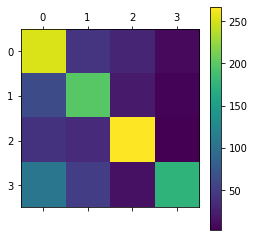

In [224]:
plt.matshow(cm)
plt.colorbar()